In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gaussian_process import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
df['date_time'] = pd.to_datetime(df['date_time'])
df['hour'] = df['date_time'].dt.hour
df['day_of_week'] = df['date_time'].dt.dayofweek
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year

df['time_step'] = (df['date_time'] - pd.Timestamp("2012-10-02 09:00:00")) // pd.Timedelta(hours=1)

# Training data
df_train = df[df['date_time'].dt.year.isin([2016, 2017])]
df_test = df[(df['date_time'].dt.year == 2018)]


X_train = df_train[['time_step']]
X_test = df_test[['time_step']]

y_train = df_train['traffic_volume']
y_test = df_test['traffic_volume']

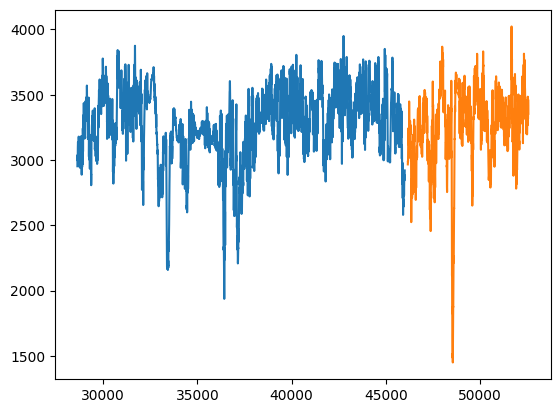

In [16]:
plt.plot(X_train, y_train.rolling(window=7*24).mean()) # rolling 7 day avg
plt.plot(X_test, y_test.rolling(window=7*24).mean())
plt.show()

In [ ]:
lst_preds = []
lst_rmse = []
for l in [0.01, 0.1, 1, 10]: # length scale values to check
    print(f'Length Scale = {l}')
    # learn gp model
    mu_s, cov_s = gp_posterior(X_train, y_train, X_test, periodic_kernel, length_scale = l, period = 7*24) # 7 day period

    stdv = np.sqrt(np.diag(cov_s))
    upper = mu_s + 2 * stdv
    lower = mu_s - 2 * stdv

    lst_preds.append(mu_s) # append predictions
    lst_rmse.append(rmse(y_test, mu_s)) # append rmse

for i in range(4):
    print(f'RMSE: {lst_rmse[i]}')

Length Scale = 0.01


/var/folders/8f/v34l03w119d4v170lxnh3y380000gn/T/ipykernel_6127/2235745164.py:8: RuntimeWarning: invalid value encountered in sqrt
  stdv = np.sqrt(np.diag(cov_s))


Length Scale = 0.1
Length Scale = 1
Length Scale = 10
RMSE: 524.0630494252748
RMSE: 524.0670974607195
RMSE: 1017.5568188696498
RMSE: 1924.7309200440964


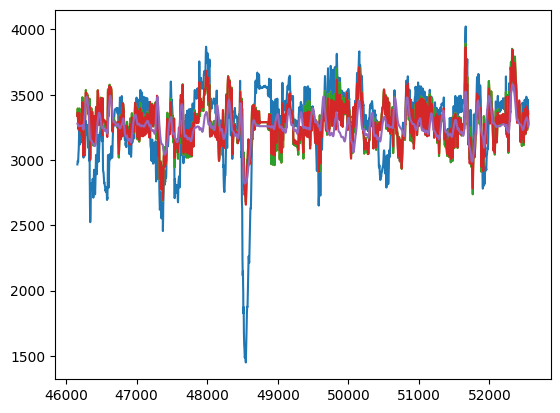

In [21]:
#plt.plot(X_train, y_train.rolling(window=7*24).mean()) # rolling 7 day avg
plt.plot(X_test, y_test.rolling(window=7*24).mean())
for i in range(4):
    plt.plot(X_test, pd.DataFrame(lst_preds[i]).rolling(window=7*24).mean())
plt.show()

In [23]:
lst_preds_1yr = []
lst_rmse_1yr = []
for l in [0.1, 1, 2, 10]: # length scale values to check
    print(f'Length Scale = {l}')
    # learn gp model
    mu_s, cov_s = gp_posterior(X_train, y_train, X_test, periodic_kernel, length_scale = l, period = 24*365) # 1 year period

    stdv = np.sqrt(np.diag(cov_s))
    upper = mu_s + 2 * stdv
    lower = mu_s - 2 * stdv

    lst_preds_1yr.append(mu_s) # append predictions
    lst_rmse_1yr.append(rmse(y_test, mu_s)) # append rmse

for i in range(4):
    print(f'RMSE: {lst_rmse[i]}')

Length Scale = 0.1


/var/folders/8f/v34l03w119d4v170lxnh3y380000gn/T/ipykernel_6797/3012461814.py:8: RuntimeWarning: invalid value encountered in sqrt
  stdv = np.sqrt(np.diag(cov_s))


Length Scale = 1
Length Scale = 2
Length Scale = 10


NameError: name 'lst_rmse' is not defined

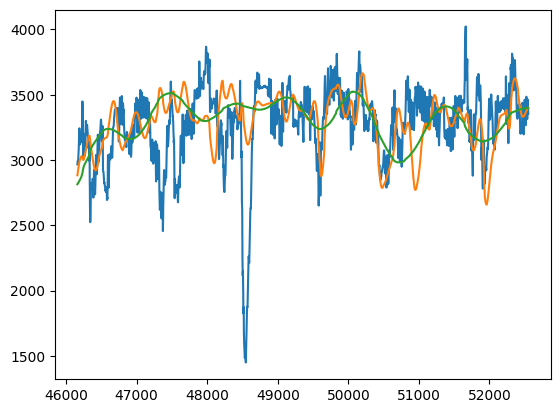

In [ ]:
#plt.plot(X_train, y_train.rolling(window=7*24).mean()) # rolling 7 day avg
plt.plot(X_test, y_test.rolling(window=7*24).mean())
for i in range(2):
    plt.plot(X_test, pd.DataFrame(lst_preds_1yr[i]).rolling(window=7*24).mean())        
plt.show()

In [6]:
def custom_kernel(x1, x2):
    '''Custom kernel. Sum of 2 periodic kernels, one for 1 week period, another for 1 year period'''
    return periodic_kernel(x1, x2, length_scale = 0.1, period = 7*24) + periodic_kernel(x1, x2, length_scale = 0.1, period = 24*365)

In [7]:
mu_s, cov_s = gp_posterior(X_train, y_train, X_test, custom_kernel) # 1 year period

stdv = np.sqrt(np.diag(cov_s))
upper = mu_s + 2 * stdv
lower = mu_s - 2 * stdv

custom_rmse = rmse(y_test, mu_s)

/var/folders/8f/v34l03w119d4v170lxnh3y380000gn/T/ipykernel_6797/3364229083.py:3: RuntimeWarning: invalid value encountered in sqrt
  stdv = np.sqrt(np.diag(cov_s))


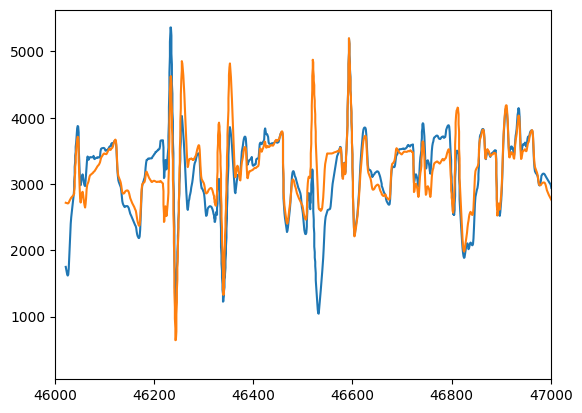

In [11]:
#plt.plot(X_train, y_train.rolling(window=7*24).mean()) # rolling 7 day avg
plt.plot(X_test, y_test.rolling(window=24).mean())
plt.plot(X_test, pd.DataFrame(mu_s).rolling(window=24).mean())   
plt.xlim(46000, 47000)     
plt.show()

In [8]:
print(custom_rmse)

546.323058275002


In [ ]:
#np.save('myarray.npy', arr)